In [1]:
# Pre-work: Staging my Environment

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Question 1: Create dataframe object from .csv file

cdemo16 = pd.read_csv('county_demographics_2016.csv', sep=',', header=0, index_col=0)

# Question 1: Display first 5 rows of dataframe object
cdemo16[0:5]

,adult_pop,female_pop,male_pop,median_age,population,pct_poverty,median_income,pct_highschool,pct_unemployed
fips,,,,,,,,,
1001,41890.0,28422.0,26994.0,38.6,55416.0,13.5,54487.0,87.6,3.4
1003,163233.0,107322.0,101241.0,42.9,208563.0,11.7,56460.0,90.0,3.7
1005,20477.0,12186.0,13779.0,40.1,25965.0,29.9,32884.0,73.8,6.2
1007,17944.0,10498.0,12145.0,39.6,22643.0,20.1,43079.0,80.7,3.5
1009,44322.0,29206.0,28498.0,41.1,57704.0,14.1,47213.0,80.0,3.0


In [3]:
# QA -- Cleaning Data, Missing & Infinite Values

# Check for missing values
# print(pd.isnull(cdemo16).sum())

# Check for infinity
# print(np.isfinite(cdemo16).all())

# QA Results: Replace infinite values with NaN

cdemo16.replace([np.inf, -np.inf], np.nan)

# QA Results: Drop missing values/NaN

modcdemo16 = cdemo16.dropna()

# QA Results: Check New DataFrame
# print(pd.isnull(modcdemo16).sum())
# print(np.isfinite(modcdemo16).all())

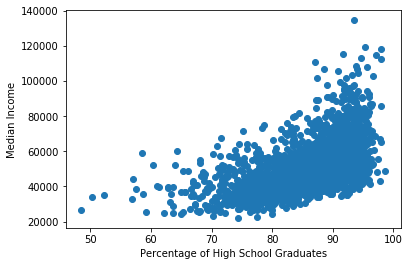

In [4]:
# Question 2: Data Visualization: Creating scatterplot variables
pctHS = modcdemo16.pct_highschool
medinc = modcdemo16.median_income

# Question 2: Data Visualization: Creation of scatterplot demonstrating relationship between median income & percentage of high school graduates
plt.scatter(pctHS, medinc)
plt.xlabel("Percentage of High School Graduates")
plt.ylabel("Median Income")
plt.show()

In [5]:
# Question 3: Data visualizaton: Create new variable (natural log of median income)
lnmedinc = np.log(medinc)

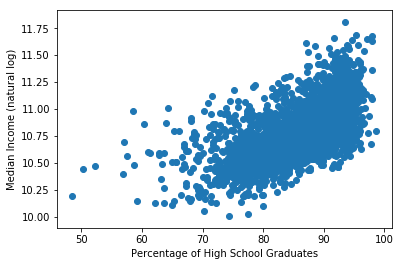

In [6]:
# Question 3: Creation of new scatterplot
plt.scatter(pctHS, lnmedinc)
plt.xlabel("Percentage of High School Graduates")
plt.ylabel("Median Income (natural log)")
plt.show()

## Relationship between percentage of high school graduates and median income

The transformation of variable 'medinc' to log variable 'lnmedinc' highlights a linear pattern in the relationship between median income and percentage of high school graduates from a given area. The relationship appears to be a positively correlated relationship. Put another way, the relationship is that the median income of a given area is high where the percentage of high school graduates is also high, and low where the percentage is low. 

In [7]:
#Question 4: Creating a feature matrix and target array
pct = pctHS[:, np.newaxis]
pct.shape

(3140, 1)

In [19]:
lnmedinc.shape

(3140,)

In [9]:
#Question 5: Creating a linear regression model with an intercept
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Question 5: Fitting the regression model
model.fit(pct, lnmedinc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Question 5: Regression model parameter: Coefficient of percentage of high school graduates
model.coef_

array([0.02258908])

In [12]:
# Question 5: Regression fit: creating the line of best fit

# pctHSfit = np.linspace(50, 100, num=100)
# pctHSfit

array([ 50.        ,  51.02040816,  52.04081633,  53.06122449,
        54.08163265,  55.10204082,  56.12244898,  57.14285714,
        58.16326531,  59.18367347,  60.20408163,  61.2244898 ,
        62.24489796,  63.26530612,  64.28571429,  65.30612245,
        66.32653061,  67.34693878,  68.36734694,  69.3877551 ,
        70.40816327,  71.42857143,  72.44897959,  73.46938776,
        74.48979592,  75.51020408,  76.53061224,  77.55102041,
        78.57142857,  79.59183673,  80.6122449 ,  81.63265306,
        82.65306122,  83.67346939,  84.69387755,  85.71428571,
        86.73469388,  87.75510204,  88.7755102 ,  89.79591837,
        90.81632653,  91.83673469,  92.85714286,  93.87755102,
        94.89795918,  95.91836735,  96.93877551,  97.95918367,
        98.97959184, 100.        ])

In [13]:
# Regression fit: creating the original scatterplot
# PCTfit = pctHSfit[:, np.newaxis]
# medincfit = model.predict(PCTfit)
# plt.scatter(pctHS, lnmedinc)
# plt.plot(pctHSfit, medincfit)

In [14]:
# Question 6(1): Supervised learning: Creating a random set of inputs
pctrandom = np.random.uniform(40,100,100)
# QA check: print(pctrandom)

In [15]:
# Question 6(1): Supervised learning: Creating new feature matrix & target array for new inputs
pctr = pctrandom[:, np.newaxis]
pctr.shape

(100, 1)

In [16]:
# Question 6(1): Supervised learning: Creating new feature matrix & target array for new inputs
medincpredict = model.predict(pctr)

medincpredict.shape
# QA check: print(medincpredict)

(100,)

In [17]:
# Question 6(1): Supervised learning: Regression fit 1: Creating the line of best fit
pctrfit = np.linspace(40, 100)
pctrfit

array([ 40.        ,  41.2244898 ,  42.44897959,  43.67346939,
        44.89795918,  46.12244898,  47.34693878,  48.57142857,
        49.79591837,  51.02040816,  52.24489796,  53.46938776,
        54.69387755,  55.91836735,  57.14285714,  58.36734694,
        59.59183673,  60.81632653,  62.04081633,  63.26530612,
        64.48979592,  65.71428571,  66.93877551,  68.16326531,
        69.3877551 ,  70.6122449 ,  71.83673469,  73.06122449,
        74.28571429,  75.51020408,  76.73469388,  77.95918367,
        79.18367347,  80.40816327,  81.63265306,  82.85714286,
        84.08163265,  85.30612245,  86.53061224,  87.75510204,
        88.97959184,  90.20408163,  91.42857143,  92.65306122,
        93.87755102,  95.10204082,  96.32653061,  97.55102041,
        98.7755102 , 100.        ])

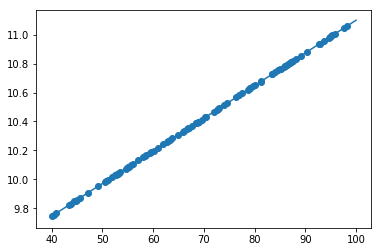

In [18]:
# Question 6(1): Supervised learning: Regression fit 2: Creating the scatterplot of projected outputs from randomized inputs 
PCTRfit = pctrfit[:, np.newaxis]
medfit = model.predict(PCTRfit)
plt.scatter(pctrandom, medincpredict)
plt.plot(PCTRfit, medfit)

In [23]:
# Question 6(2): Supervised learning: Generating new line-of-fit

print(pctHS.describe())
pctHSfit = np.linspace(48.5, 98.7, num=100)
pctHSfit

count    3140.000000
mean       85.812452
std         6.542260
min        48.500000
25%        81.700000
50%        87.250000
75%        90.700000
max        98.700000
Name: pct_highschool, dtype: float64


array([48.5       , 49.00707071, 49.51414141, 50.02121212, 50.52828283,
       51.03535354, 51.54242424, 52.04949495, 52.55656566, 53.06363636,
       53.57070707, 54.07777778, 54.58484848, 55.09191919, 55.5989899 ,
       56.10606061, 56.61313131, 57.12020202, 57.62727273, 58.13434343,
       58.64141414, 59.14848485, 59.65555556, 60.16262626, 60.66969697,
       61.17676768, 61.68383838, 62.19090909, 62.6979798 , 63.20505051,
       63.71212121, 64.21919192, 64.72626263, 65.23333333, 65.74040404,
       66.24747475, 66.75454545, 67.26161616, 67.76868687, 68.27575758,
       68.78282828, 69.28989899, 69.7969697 , 70.3040404 , 70.81111111,
       71.31818182, 71.82525253, 72.33232323, 72.83939394, 73.34646465,
       73.85353535, 74.36060606, 74.86767677, 75.37474747, 75.88181818,
       76.38888889, 76.8959596 , 77.4030303 , 77.91010101, 78.41717172,
       78.92424242, 79.43131313, 79.93838384, 80.44545455, 80.95252525,
       81.45959596, 81.96666667, 82.47373737, 82.98080808, 83.48

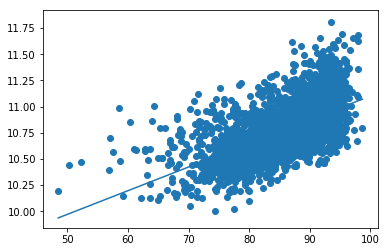

In [22]:
# Quesetion 6(2): Supervised learning: Creating scatterplot with new line of best fit

PCTfit = pctHSfit[:, np.newaxis]
medincfit = model.predict(PCTfit)
plt.scatter(pctHS, lnmedinc)
plt.plot(pctHSfit, medincfit)

### An Explanatory Note re: Question 6

I was genuinely unclear as to what Question 6 was asking. I wasn't sure whether we were supposed to: generate 100 new values for 'x', predict their y-values, and then plot them; or create a line of best fit using 100 values generated via 'np.linspace' and then superimpose that line over the scatterplot of original data. So, I coded both. I coded the former with the designation '6(1)' in the header notes, and the latter with '6(2)' in the header notes. 